In [1]:
import pandas, numpy
import sklearn, sklearn.preprocessing, sklearn.impute, sklearn.decomposition

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(9, 6)})

# 0. user defined variables

In [2]:
#untargetted_data_file = '/home/adrian/projects/HUVECs/data/untargetted/AllBatches/ROSA_ACID_NEG_UT_NOMISNORM_AllBatches.csv'
untargetted_data_file = '/Users/adrian/gd15/hi/research/huvec/data/ROSA_ACID_NEG_UT_NOMISNORM_AllBatches.csv'

# 1. read data

In [3]:
original_data = pandas.read_csv(untargetted_data_file, sep=',')
original_data.head()

,Sample,Number,Treatment,Batch,Cell number,TIME,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,...,X737.14193,X740.16098,X740.71343000000002,X740.73257999999998,X740.74688000000003,X743.16147000000001,X743.48454000000004,X745.12892999999997,X745.14395999999999,X745.16129000000001
0,EC_Rosa_1_650,29,100,1,390000.0,24,5.852441,5.932726,5.051917,6.345683,...,5.733799,6.246663,7.201546,7.119625,7.096909,6.742333,5.687035,5.426009,5.642669,5.644448
1,EC_Rosa_1_651,6,EGM,1,560000.0,4,5.462459,5.891913,5.674451,6.460181,...,5.427957,6.217484,6.905804,6.942619,6.920406,6.188310,5.390414,6.422549,6.334127,6.313065
2,EC_Rosa_1_652,15,100,1,205000.0,4,5.031187,6.234452,5.298766,6.377965,...,4.870114,5.607866,6.688953,6.825913,6.793644,5.682537,5.083870,4.992752,5.381865,5.369995
3,EC_Rosa_1_653,26,10,1,525000.0,24,5.221399,5.712806,4.806511,6.193561,...,5.410174,6.281541,6.345312,6.482471,6.455920,6.475335,5.546431,6.060435,6.212212,6.286286
4,EC_Rosa_1_654,20,EGM,1,830000.0,24,5.786133,6.009039,5.477244,6.049853,...,4.865940,5.866259,6.888398,7.034687,7.036220,6.034948,5.554022,5.841243,6.112518,6.127484


# 2. analysis

In [4]:
# compute normalized value
info = original_data.iloc[:, :6]
info.head()

,Sample,Number,Treatment,Batch,Cell number,TIME
0,EC_Rosa_1_650,29,100,1,390000.0,24
1,EC_Rosa_1_651,6,EGM,1,560000.0,4
2,EC_Rosa_1_652,15,100,1,205000.0,4
3,EC_Rosa_1_653,26,10,1,525000.0,24
4,EC_Rosa_1_654,20,EGM,1,830000.0,24


In [5]:
nbcn = original_data.iloc[:, 6:]
nbcn.head()

,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,...,X737.14193,X740.16098,X740.71343000000002,X740.73257999999998,X740.74688000000003,X743.16147000000001,X743.48454000000004,X745.12892999999997,X745.14395999999999,X745.16129000000001
0,5.852441,5.932726,5.051917,6.345683,6.097337,6.380415,8.783008,7.343394,5.923638,6.124354,...,5.733799,6.246663,7.201546,7.119625,7.096909,6.742333,5.687035,5.426009,5.642669,5.644448
1,5.462459,5.891913,5.674451,6.460181,6.203644,6.171597,8.776677,7.662557,5.725006,5.875586,...,5.427957,6.217484,6.905804,6.942619,6.920406,6.188310,5.390414,6.422549,6.334127,6.313065
2,5.031187,6.234452,5.298766,6.377965,6.135880,6.448733,8.799498,8.328993,5.363318,5.673778,...,4.870114,5.607866,6.688953,6.825913,6.793644,5.682537,5.083870,4.992752,5.381865,5.369995
3,5.221399,5.712806,4.806511,6.193561,6.361619,6.310878,8.529330,7.415047,5.502126,5.983241,...,5.410174,6.281541,6.345312,6.482471,6.455920,6.475335,5.546431,6.060435,6.212212,6.286286
4,5.786133,6.009039,5.477244,6.049853,6.285863,6.221632,9.270877,8.432439,4.911845,5.429880,...,4.865940,5.866259,6.888398,7.034687,7.036220,6.034948,5.554022,5.841243,6.112518,6.127484


In [6]:
nbcn = nbcn.div(original_data['Cell  number']/1e6, axis=0)
nbcn.head()

,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,...,X737.14193,X740.16098,X740.71343000000002,X740.73257999999998,X740.74688000000003,X743.16147000000001,X743.48454000000004,X745.12892999999997,X745.14395999999999,X745.16129000000001
0,15.006258,15.212117,12.953634,16.270983,15.634198,16.360037,22.520534,18.829216,15.188816,15.703472,...,14.702049,16.017085,18.465503,18.255449,18.197202,17.288033,14.582141,13.912843,14.468383,14.472944
1,9.754391,10.521273,10.132949,11.536037,11.077936,11.020709,15.672637,13.683137,10.223224,10.492118,...,9.692781,11.102651,12.331793,12.397534,12.357868,11.050554,9.625739,11.468837,11.310942,11.273330
2,24.542374,30.411959,25.847641,31.112022,29.931124,31.457236,42.924379,40.629233,26.162527,27.676966,...,23.756654,27.355442,32.629037,33.297136,33.139729,27.719694,24.799367,24.354890,26.252998,26.195098
3,9.945521,10.881535,9.155259,11.797260,12.117370,12.020721,16.246342,14.123898,10.480240,11.396649,...,10.305093,11.964839,12.086309,12.347565,12.296991,12.333971,10.564631,11.543686,11.832785,11.973878
4,6.971244,7.239806,6.599089,7.288980,7.573329,7.495943,11.169732,10.159565,5.917885,6.542024,...,5.862579,7.067782,8.299275,8.475527,8.477373,7.271022,6.691593,7.037642,7.364479,7.382511


In [7]:
normalized_met = pandas.concat([info, nbcn.reindex(info.index)], axis=1)
normalized_met.head()

,Sample,Number,Treatment,Batch,Cell number,TIME,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,...,X737.14193,X740.16098,X740.71343000000002,X740.73257999999998,X740.74688000000003,X743.16147000000001,X743.48454000000004,X745.12892999999997,X745.14395999999999,X745.16129000000001
0,EC_Rosa_1_650,29,100,1,390000.0,24,15.006258,15.212117,12.953634,16.270983,...,14.702049,16.017085,18.465503,18.255449,18.197202,17.288033,14.582141,13.912843,14.468383,14.472944
1,EC_Rosa_1_651,6,EGM,1,560000.0,4,9.754391,10.521273,10.132949,11.536037,...,9.692781,11.102651,12.331793,12.397534,12.357868,11.050554,9.625739,11.468837,11.310942,11.273330
2,EC_Rosa_1_652,15,100,1,205000.0,4,24.542374,30.411959,25.847641,31.112022,...,23.756654,27.355442,32.629037,33.297136,33.139729,27.719694,24.799367,24.354890,26.252998,26.195098
3,EC_Rosa_1_653,26,10,1,525000.0,24,9.945521,10.881535,9.155259,11.797260,...,10.305093,11.964839,12.086309,12.347565,12.296991,12.333971,10.564631,11.543686,11.832785,11.973878
4,EC_Rosa_1_654,20,EGM,1,830000.0,24,6.971244,7.239806,6.599089,7.288980,...,5.862579,7.067782,8.299275,8.475527,8.477373,7.271022,6.691593,7.037642,7.364479,7.382511


In [8]:
# remove conditions for which cell numbers are not available
print('conditions before filtering {}'.format(normalized_met.shape[0]))
finite_normalized_met = normalized_met[numpy.isfinite(normalized_met['Cell  number']) == True]
print('conditions after filtering {}'.format(finite_normalized_met.shape[0]))

conditions before filtering 130
conditions after filtering 121


## 2.1. reproduce metabolite face values

In [9]:
original_data.columns.to_list()

['Sample',
 'Number',
 'Treatment',
 'Batch',
 'Cell  number',
 'TIME',
 'X59.01097',
 'X61.017890000000001',
 'X67.016220000000004',
 'X74.021450000000002',
 'X77.052040000000005',
 'X77.052049999999994',
 'X78.956580000000002',
 'X78.956770000000006',
 'X79.955420000000004',
 'X80.962869999999995',
 'X80.962720000000004',
 'X82.951819999999998',
 'X84.006739999999994',
 'X84.043059999999997',
 'X84.949100000000001',
 'X85.027289999999994',
 'X85.027019999999993',
 'X85.027270000000001',
 'X86.991519999999994',
 'X87.006460000000004',
 'X88.037970000000001',
 'X88.037940000000006',
 'X88.038039999999995',
 'X88.03792',
 'X89.022130000000004',
 'X89.022099999999995',
 'X89.040549999999996',
 'X92.032160000000005',
 'X92.031949999999995',
 'X92.925600000000003',
 'X93.043189999999996',
 'X94.922759999999997',
 'X96.919939999999997',
 'X96.965789999999998',
 'X96.967179999999999',
 'X96.957989999999995',
 'X96.965829999999997',
 'X97.009529999999998',
 'X100.0742',
 'X102.02508',
 'X102.

In [10]:
metabolite_peak = 'X147.02834999999999'
metabolite_name = '2-hydroxy glutarate'

In [11]:
treatments = ['EGM', '1', '10', '100']
timepoints = [0, 4, 24]

conditions = [('EGM', 0), ('EGM', 4), ('EGM', 24)]
for treatment in treatments[1:]:
    for timepoint in timepoints[1:]:
        condition = (treatment, timepoint)
        conditions.append(condition)
print(conditions)

[('EGM', 0), ('EGM', 4), ('EGM', 24), ('1', 4), ('1', 24), ('10', 4), ('10', 24), ('100', 4), ('100', 24)]


In [12]:
all_values = []
for condition in conditions:
    treatment = condition[0]; timepoint = condition[1]
    sub = original_data[(original_data['Treatment'] == treatment) & (original_data['TIME'] == timepoint)][metabolite_peak]
        
    print('Concentration {}, time {}. Shape: {}, mean: {}'.format(treatment, timepoint, sub.shape, sub.mean()))
    all_values.append(sub.values)
    
all_values

Concentration EGM, time 0. Shape: (12,), mean: 6.378488712004114
Concentration EGM, time 4. Shape: (15,), mean: 6.33328649330898
Concentration EGM, time 24. Shape: (15,), mean: 6.564959582400885
Concentration 1, time 4. Shape: (14,), mean: 6.2241136252485205
Concentration 1, time 24. Shape: (15,), mean: 6.419662242663789
Concentration 10, time 4. Shape: (15,), mean: 6.178668586042096
Concentration 10, time 24. Shape: (14,), mean: 6.281297872914787
Concentration 100, time 4. Shape: (15,), mean: 6.405464942948445
Concentration 100, time 24. Shape: (15,), mean: 6.1647132372389555


[array([6.33400082, 6.2511958 , 6.65731248, 7.31903625, 6.63998559,
        6.99851496, 6.8046011 , 5.82922879, 6.1122503 , 5.56362193,
        6.15096553, 5.881151  ]),
 array([6.58575253, 6.48127762, 6.50990127, 7.19874887, 7.12678913,
        7.31460327, 5.35761024, 5.46413735, 5.76650446, 5.5176505 ,
        5.69996773, 5.93979545, 6.82268724, 6.4349748 , 6.77889697]),
 array([6.41386581, 6.08175576, 6.17113515, 8.33835841, 8.11970483,
        8.39649917, 5.62826121, 6.21949741, 6.15851841, 5.94848541,
        5.55657711, 5.23722183, 6.58418035, 6.71967219, 6.90066068]),
 array([6.18888591, 6.50167354, 6.38899057, 6.98483946, 7.32583029,
        7.22670825, 4.96801526, 5.76999296, 6.05881022, 5.44413939,
        5.66770874, 5.61161149, 6.67953444, 6.32085023]),
 array([6.24027101, 6.79377125, 6.66934627, 6.8118785 , 5.98715632,
        6.10991479, 6.6213501 , 6.31663246, 6.13810439, 6.03754042,
        5.88438019, 5.97458012, 7.00572804, 6.87919671, 6.82508308]),
 array([6.32273676

Text(0.5, 1.0, '2-hydroxy glutarate')

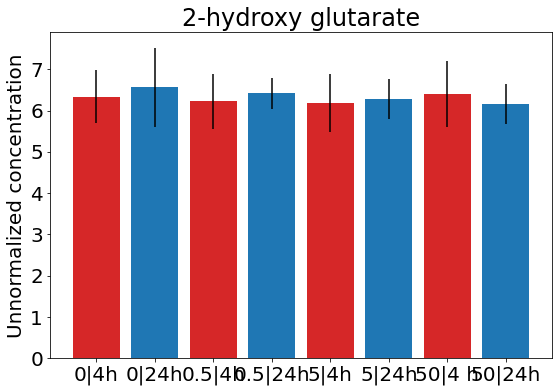

In [13]:
bar_positions = [0, 1, 2, 3, 4, 5, 6, 7, 8]
bar_heights = [numpy.mean(element) for element in all_values]
bar_error = [numpy.std(element) for element in all_values]
the_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:blue', 'tab:red', 'tab:blue', 'tab:red', 'tab:blue']
matplotlib.pyplot.bar(bar_positions[1:], height=bar_heights[1:], yerr=bar_error[1:], color=the_colors)

matplotlib.pyplot.ylabel('Unnormalized concentration')
matplotlib.pyplot.xticks(bar_positions[1:], ['0|4h', '0|24h', '0.5|4h', '0.5|24h', '5|4h', '5|24h', '50|4 h', '50|24h'])
matplotlib.pyplot.title(metabolite_name)

## 2.2. reproduce metabolite normalized by cell numbers

In [14]:
all_values = []
for condition in conditions:
    treatment = condition[0]; timepoint = condition[1]
    sub = finite_normalized_met[(finite_normalized_met['Treatment'] == treatment) & (finite_normalized_met['TIME'] == timepoint)][metabolite_peak]
        
    print('Concentration {}, time {}. Shape: {}, mean: {}'.format(treatment, timepoint, sub.shape, sub.mean()))
    all_values.append(sub.values)
    
all_values

Concentration EGM, time 0. Shape: (6,), mean: 17.542993725369215
Concentration EGM, time 4. Shape: (15,), mean: 17.140778801307402
Concentration EGM, time 24. Shape: (15,), mean: 13.025667335927812
Concentration 1, time 4. Shape: (14,), mean: 19.067019749118185
Concentration 1, time 24. Shape: (15,), mean: 14.35220755685518
Concentration 10, time 4. Shape: (15,), mean: 17.708726277197353
Concentration 10, time 24. Shape: (14,), mean: 13.718543068971353
Concentration 100, time 4. Shape: (15,), mean: 21.176402809077235
Concentration 100, time 24. Shape: (12,), mean: 10.864095758604002


[array([13.19583504, 13.02332458, 13.86940099, 20.60600716, 22.78135383,
        21.78204075]),
 array([11.76027237, 11.57371003, 11.62482369, 28.23038774, 27.94819266,
        28.68471869, 16.74253201, 17.07542921, 18.02032643, 15.76471571,
        16.28562208, 16.97084413, 12.40488588, 11.69995417, 12.32526722]),
 array([ 7.72754917,  7.32741658,  7.43510259, 11.42240879, 11.12288333,
        11.50205366,  8.65886341,  9.56845755,  9.4746437 , 26.43771293,
        24.69589828, 23.27654148, 11.971237  , 12.2175858 , 12.54665578]),
 array([12.13507041, 12.74837949, 12.52743249, 25.39941623, 26.63938287,
        26.27893909, 10.80003317, 12.54346296, 13.17132656, 29.91285381,
        31.14125683, 30.83303018, 11.71848147, 11.08921092]),
 array([10.66712993, 11.6132842 , 11.40059192, 10.81250556,  9.50342273,
         9.69827745,  8.82846679,  8.42217661,  8.18413919, 10.06256736,
         9.80730031,  9.95763353, 32.58478157, 31.99626375, 31.74457245]),
 array([16.63878094, 16.02147888,

Text(0.5, 1.0, '2-hydroxy glutarate')

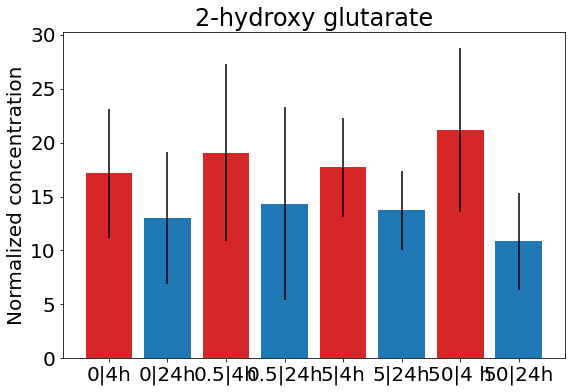

In [15]:
bar_positions = [0, 1, 2, 3, 4, 5, 6, 7, 8]
bar_heights = [numpy.mean(element) for element in all_values]
bar_error = [numpy.std(element) for element in all_values]
the_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:blue', 'tab:red', 'tab:blue', 'tab:red', 'tab:blue']
matplotlib.pyplot.bar(bar_positions[1:], height=bar_heights[1:], yerr=bar_error[1:], color=the_colors)

matplotlib.pyplot.ylabel('Normalized concentration')
matplotlib.pyplot.xticks(bar_positions[1:], ['0|4h', '0|24h', '0.5|4h', '0.5|24h', '5|4h', '5|24h', '50|4 h', '50|24h'])
matplotlib.pyplot.title(metabolite_name)